# Looking at your data

The goal of the dataset is to faithfully and completely capture the parent distribution, or what the data will look like in the wild when the model is used. Dataset can be summarized by mean, median, std.dev, min and max value and std.error. Std.error is also known as standard error of the mean $\bar{x}$. This is the stf.dev divided by the square root of the number of the elements in the dataset. 

The std. error is a measure of the difference between dataset mean value $\bar{x}$ and the mean value of the parent distribution. Idea is that if we have more data, we'll have better idea of the parent distribution that is generating this data, and so the mean value of the dataset will be closer to the mean value of the parent distribution. 

In [22]:
import numpy as np

f = [0.3408,3.0150,4.3465,2.1271,2.7561,
     2.7887,4.8231,0.0705,3.9897,0.9804,
     2.3944,2.0085,1.7821,1.5362,2.3190]
f = np.array(f)

print
print("mean  = %0.4f" % f.mean())
print("std   = %0.4f" % f.std())
print("SE    = %0.4f" % (f.std()/np.sqrt(f.shape[0])))
print("median= %0.4f" % np.median(f))
print("min   = %0.4f" % f.min())
print("max   = %0.4f" % f.max())

mean  = 2.3519
std   = 1.3128
SE    = 0.3390
median= 2.3190
min   = 0.0705
max   = 4.8231


# Building datasets

## Iris



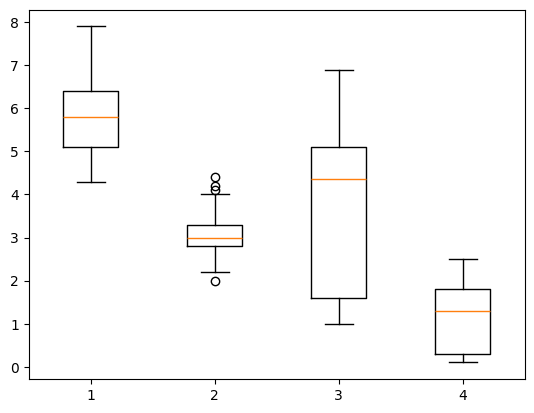

In [23]:
import numpy as np 
import matplotlib.pyplot as plt 

with open("./data/iris.data") as f:
    lines = [i[:-1]for i in f.readlines()]
n = ["Iris-setosa","Iris-versicolor","Iris-virginica"]
# print(n.index("Iris-virginica"))
# x = lables
x = [n.index(i.split(",")[-1]) for i in lines if i != ""]
x = np.array(x, dtype="uint8")
# print(x.shape)
# y = features
y = [[float(j) for j in i.split(",")[:-1]] for i in lines if i != ""]
y = np.array(y)
# print(y.shape)
idx = np.argsort(np.random.random(x.shape[0]))
x = x[idx]
y = y[idx]
np.save("./data/iris_features", y)
np.save("./data/iris_labels", x)
plt.boxplot(y)
plt.show()



## Breast Cancer

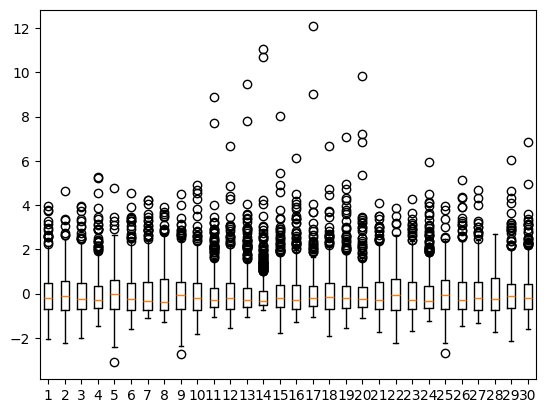

In [24]:
import numpy as np 
import matplotlib.pyplot as plt


with open("./data/wdbc.data") as f :
    lines = [i[:-1] for i in f.readlines() if i!= ""]

n = ["B", "M"]
x = [n.index(i.split(",")[1]) for i in lines]
x = np.array(x, dtype="uint8")
y = [[float(j) for j in i.split(",")[2:]] for i in lines]
y = np.array(y)


# Randomize
idx = np.argsort(np.random.random(x.shape[0]))
x = x[idx]
y = y[idx]
y_normalized = (y - y.mean(axis=0))/ y.std(axis=0)

np.save("./data/bc_features.npy", y)
np.save("./data/bc_features_normalized.npy", y_normalized)
np.save("./data/bc_labels.npy", x)
plt.boxplot(y_normalized)
plt.show()



## MNIST Digits

In [25]:
import numpy as np 
import keras
from keras.datasets import mnist

(xtrn, ytrn), (xtst, ytst) = mnist.load_data()
# print(f"xtrn shape: {xtrn.shape}")
# print(f"ytrn shape: {ytrn.shape}")
# print(f"xtst shape: {xtst.shape}")
# print(f"ytst shape: {ytst.shape}")
idx = np.argsort(np.random.random(ytrn.shape[0]))
xtrn = xtrn[idx]
ytrn = ytrn[idx]
idx = np.argsort(np.random.random(ytst.shape[0]))
xtst = xtst[idx]
ytst = ytst[idx]
np.save("./data/mnist_train_images.npy", xtrn)
np.save("./data/mnist_train_lables.npy", ytrn)
np.save("./data/mnist_test_images.npy", xtst)
np.save("./data/mnist_test_lables.npy", ytst)

# store images as vectors

xtrn_v = xtrn.reshape((60000, 28*28))
xtst_v = xtst.reshape((10000, 28*28))
np.save("./data/mnist_train_vectors.npy", xtrn_v)
np.save("./data/mnist_test_vectors.npy", xtst_v)

# srcamble the just created vectors (jumble up)

idx = np.argsort(np.random.random(28*28))
for i in range(60000):
    xtrn_v[i, :] = xtrn_v[i, idx]
for j in range(10000):
    xtst_v[j, :] = xtst_v[j, idx]

np.save("./data/mnist_train_scrambled_vectors.npy", xtrn_v)
np.save("./data/mnist_test_scrambled_vectors.npy", xtst_v)

# make images with scrambled vectors

temp =  np.zeros((60000, 28, 28))
for i in range(60000):
    temp[i, :, :] = xtrn_v[i, :].reshape((28, 28))

np.save("./data/mnist_train_scrambled_images.npy", temp)

temp =  np.zeros((10000, 28, 28))
for i in range(10000):
    temp[i, :, :] = xtst_v[i, :].reshape((28, 28))

np.save("./data/mnist_test_scrambled_images.npy", temp)


## CIFAR-10

In [26]:
import numpy as np
import keras
from keras.datasets import cifar10

(xtrn, ytrn), (xtst, ytst) = cifar10.load_data()
idx = np.argsort(np.random.random(ytrn.shape[0]))
xtrn = xtrn[idx]
ytrn = ytrn[idx]
idx = np.argsort(np.random.random(ytst.shape[0]))
xtst = xtst[idx]
ytst = ytst[idx]
np.save("./data/cifar10_train_images.npy", xtrn)
np.save("./data/cifar10_train_lables.npy", ytrn)
np.save("./data/cifar10_test_images.npy", xtst)
np.save("./data/cifar10_test_lables.npy", ytst)

# store images as vectors

xtrn_v = xtrn.reshape((50000, 32*32*3)) # color images
xtst_v = xtst.reshape((10000, 32*32*3)) # color images
np.save("./data/cifar10_train_vectors.npy", xtrn_v)
np.save("./data/cifar10_test_vectors.npy", xtst_v)